In [5]:
!pip install kagglehub

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhbadole/bank-customer-churn-prediction-dataset")

print("Path to dataset files:", path)

100%|████████████████████████████████████████████████████████████████████████████████| 262k/262k [00:01<00:00, 219kB/s]

Extracting files...
Path to dataset files: C:\Users\phiri\.cache\kagglehub\datasets\saurabhbadole\bank-customer-churn-prediction-dataset\versions\2


In [1]:
dataset_path = r"C:\Users\phiri\.cache\kagglehub\datasets\saurabhbadole\bank-customer-churn-prediction-dataset\versions\2\Churn_Modelling.csv"

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(dataset_path)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
print(df.isnull().sum())

# Churn(class) distribution
print(df['Exited'].value_counts(normalize=True))


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [7]:
# The Churn or class distribution we can see that its imbalanced. 
# What this means that we can get misleading results even if the model we train get high accuracy
# For example a model can predict '0' for all and still get 79.63 % accuracy. Thats a misleading results because for the other class the predictions
# were incorrect

# Before we can apply techniques to fix the imbalance we check how the model will perform but more importantly will use better metrics not just accuracy 
# But we will include metrics like precision, recall and F1-Score

# Data Preprocessing

In [8]:
df_original = df.copy()

In [9]:
# Lets drop columns not useful( they are just identifiers and not going to help in the prediction of the model)
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [10]:
# Lets encode the categorical features
# Gender Column - binary encoding (Male = 1, Female = 0)
# Going to be easier to work with a numbers
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Geography - one-hot encoding (get dummies, drop first to avoid multicollinearity)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [13]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 800.9 KB


In [15]:
# STEP 3: Feature Scaling (optional, but good for Logistic Regression)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True


# Exploratory Data Analysis

In [17]:
# We will look at how the features(age, balance etc) relate to the churn
# Trends and any Outliers
# We have already checked out the Churn Distribution though


## Age vs Churn

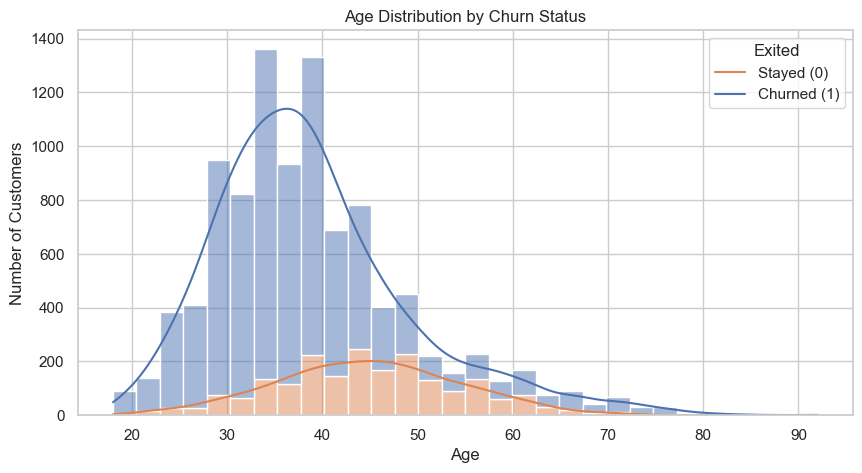

In [18]:
# Lets see how age of a customer relates to the Churn

import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Plot age distribution for churned vs. not churned
plt.figure(figsize=(10, 5))
sns.histplot(data=df_original, x='Age', hue='Exited', multiple='stack', kde=True, bins=30)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()


## Balance vs Churn Status

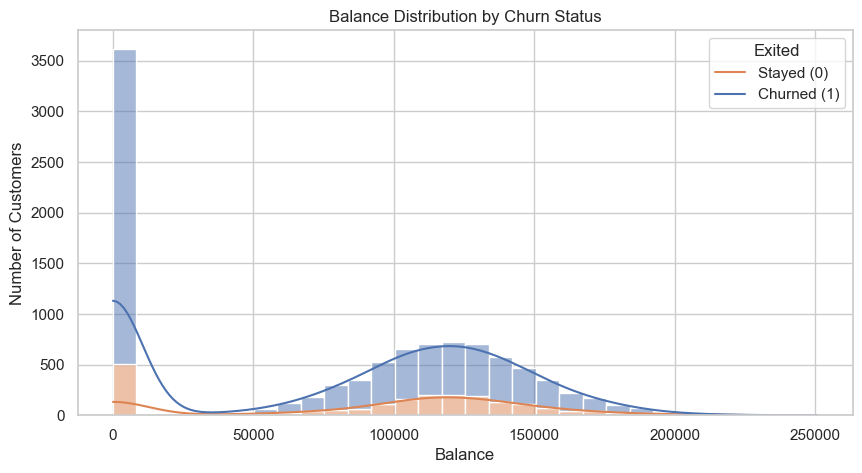

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_original, x='Balance', hue='Exited', multiple='stack', kde=True, bins=30)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()


## Churn Status by Tenure

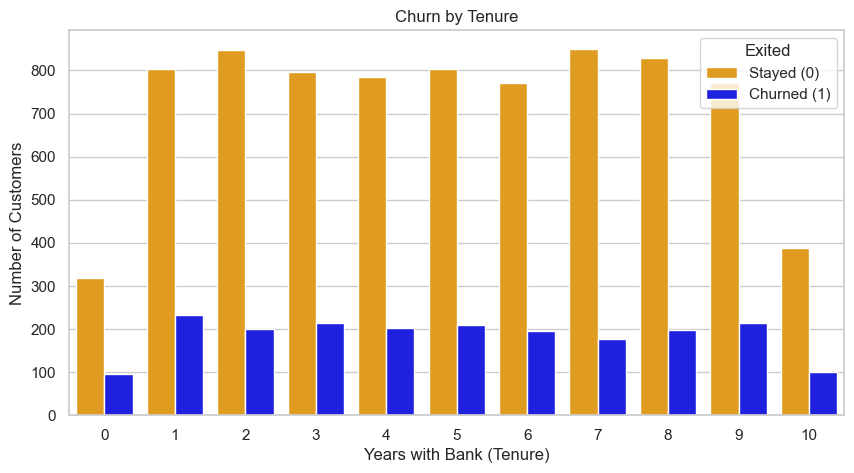

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_original, x='Tenure', hue='Exited', palette={0: "orange", 1: "blue"})
plt.title("Churn by Tenure")
plt.xlabel("Years with Bank (Tenure)")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()


## Number of Products vs Churn

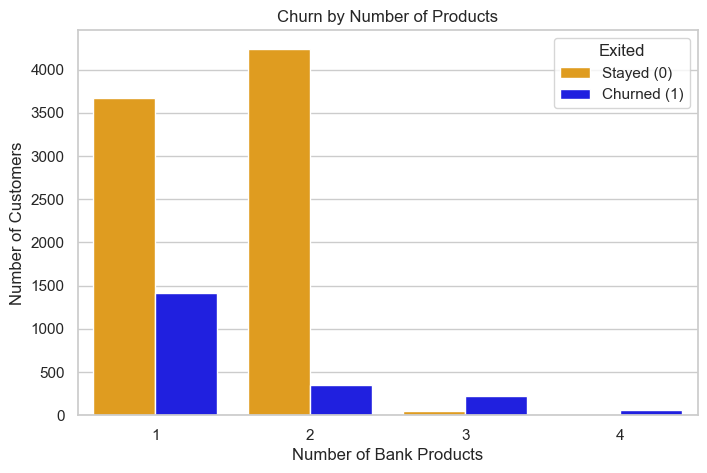

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_original, x='NumOfProducts', hue='Exited', palette={0: "orange", 1: "blue"})
plt.title("Churn by Number of Products")
plt.xlabel("Number of Bank Products")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()


In [24]:
df_original

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Geograpy(Location) vs Churn

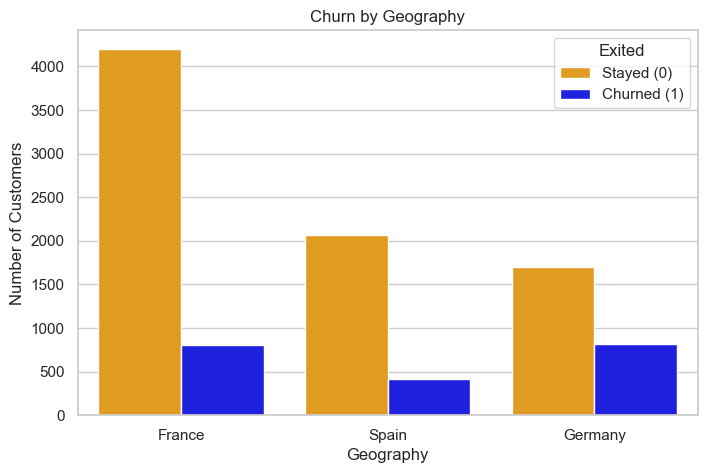

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_original, x='Geography', hue='Exited', palette={0: "orange", 1: "blue"})
plt.title("Churn by Geography")
plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()


## Customer Activeness vs Churn

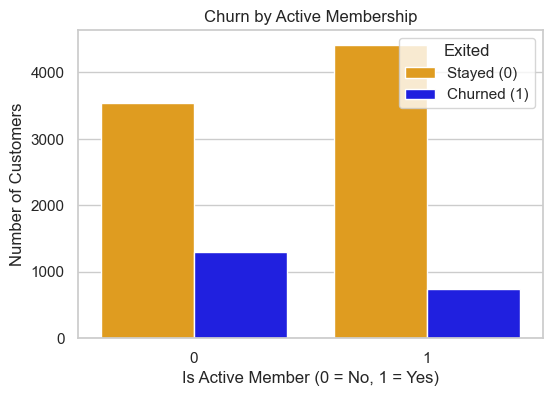

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_original, x='IsActiveMember', hue='Exited', palette={0: "orange", 1: "blue"})
plt.title("Churn by Active Membership")
plt.xlabel("Is Active Member (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])
plt.show()


## Credit Score vs Churn

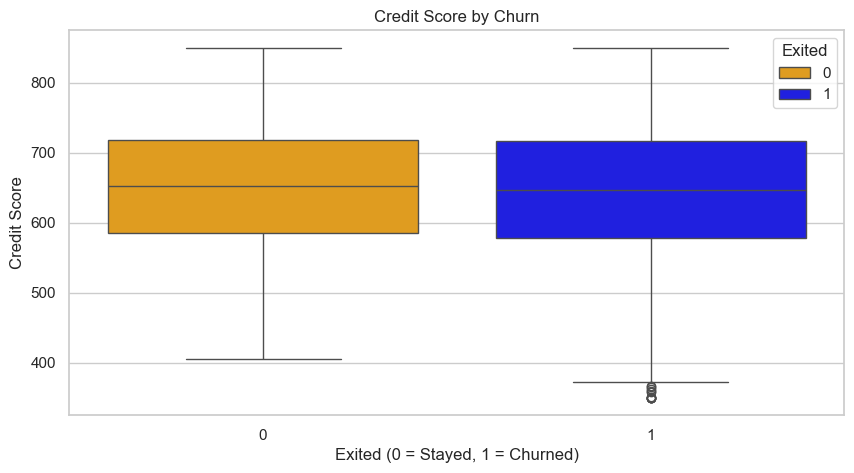

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_original, x='Exited', y='CreditScore',hue ='Exited',palette={0: 'orange', 1: 'blue'})
plt.title("Credit Score by Churn")
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Credit Score")
plt.show()


In [31]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True


In [32]:
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)


# Modeling

In [43]:
from sklearn.model_selection import train_test_split

# 1. Separate features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# 2. Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Initialize the model
logreg = LogisticRegression(max_iter=1000)

# 2. Fit to training data
logreg.fit(X_train, y_train)

# 3. Make predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # for ROC-AUC


In [45]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_score:.4f}")


Confusion Matrix:
[[2319   70]
 [ 491  120]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.63      0.20      0.30       611

    accuracy                           0.81      3000
   macro avg       0.73      0.58      0.60      3000
weighted avg       0.79      0.81      0.77      3000


ROC-AUC Score: 0.7882


## XGBoost Model

In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Train on training data
xgb.fit(X_train, y_train)

# 3. Predict on test data
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]  # For ROC-AUC


C:\Users\phiri\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:01:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [47]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"\nROC-AUC Score: {roc_auc_xgb:.4f}")


Confusion Matrix:
[[2258  131]
 [ 304  307]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.70      0.50      0.59       611

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.75      3000
weighted avg       0.84      0.85      0.85      3000


ROC-AUC Score: 0.8475


# Model Retraining with Feature Engineering Applied

In [ ]:
# We...

In [49]:
df2 = df.copy()

In [50]:
df2['AgeGroup'] = pd.cut(df_original['Age'],
                        bins=[17, 30, 50, 100],
                        labels=['Young', 'Adult', 'Senior'])


In [51]:
df2 = pd.get_dummies(df2, columns=['AgeGroup'], drop_first=True)


In [53]:
df2['EngagedCustomer'] = ((df_original['IsActiveMember'] == 1) & 
                         (df_original['NumOfProducts'] > 1)).astype(int)


In [56]:
df2['EngagedCustomer']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: EngagedCustomer, Length: 10000, dtype: int32

In [57]:
df2['EngagedCustomer'].unique()

array([0, 1])

In [58]:
# Setting the target variable
y = df2['Exited']
# Setting the features
# Drop target column from features
X = df2.drop('Exited', axis=1)


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
y_proba_log = logreg.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

roc_log = roc_auc_score(y_test, y_proba_log)
print(f"\nROC-AUC Score: {roc_log:.4f}")


Confusion Matrix:
[[2317   72]
 [ 483  128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2389
           1       0.64      0.21      0.32       611

    accuracy                           0.81      3000
   macro avg       0.73      0.59      0.60      3000
weighted avg       0.79      0.81      0.78      3000


ROC-AUC Score: 0.7972


In [62]:
from xgboost import XGBClassifier

xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb2.fit(X_train, y_train)

y_pred_xgb = xgb2.predict(X_test)
y_proba_xgb = xgb2.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

roc_xgb = roc_auc_score(y_test, y_proba_xgb)
print(f"\nROC-AUC Score: {roc_xgb:.4f}")


C:\Users\phiri\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[2248  141]
 [ 298  313]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2389
           1       0.69      0.51      0.59       611

    accuracy                           0.85      3000
   macro avg       0.79      0.73      0.75      3000
weighted avg       0.84      0.85      0.85      3000


ROC-AUC Score: 0.8485


## Feature Importance Analysis 

<Figure size 1000x600 with 0 Axes>

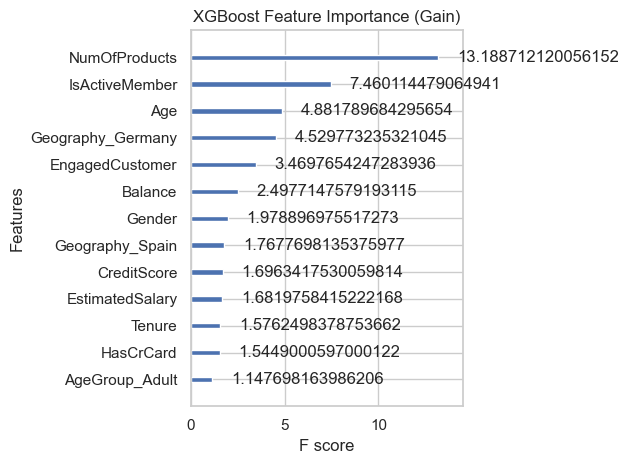

In [68]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot top 10 most important features
plt.figure(figsize=(10, 6))
plot_importance(xgb2, max_num_features=20, importance_type='gain', title="XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()


# Dashboard

In [71]:
# Copy original and add engineered features
df_dashboard = df_original.copy()
df_dashboard['EngagedCustomer'] = df2['EngagedCustomer']
df_dashboard['AgeGroup_Adult'] = df2['AgeGroup_Adult']
df_dashboard['AgeGroup_Senior'] = df2['AgeGroup_Senior']

# Save it
df_dashboard.to_csv(r"C:\Users\phiri\Documents\churn_dashboard_data.csv", index=False)


In [73]:
df_dashboard.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EngagedCustomer,AgeGroup_Adult,AgeGroup_Senior
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,True,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,True,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,True,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,True,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,True,False


In [72]:
import joblib
joblib.dump(xgb2, "xgb_model.pkl")


['xgb_model.pkl']

In [74]:
# The streamlit dashboard code was created using notepad
#The code was ran via cmd using the following command "streamlit run churn_dashboard.py"
# Note!! dont forget to set path correctly to the dataset, the saved model
# Also install the streamlit libary before running

!pip install streamlit
